In [0]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
from google.colab import drive
drive.mount("/content/gdrive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


Here the first three and last two images queried by EI acquisition for MNIST binary classification of 7 vs. 9 with batch size 25 are shown (across experiments)

In [0]:
folder_path = "/content/gdrive/My Drive/FINAL_PAPER_ACTIVE_LEARNING_EXP/MNIST/Binary_7_9_AL_Results/"
#Loading indices of training data in order of acquisition for BS 25 experiments
ei_tauinvm5_ind_1 = np.load(folder_path+"EI_BS25_TauInv8.37e-05_Ind_Ind1.npy")
ei_tauinvm5_ind_2 = np.load(folder_path+"EI_BS25_TauInv8.37e-05_Ind_Ind2.npy")
ei_tauinvm5_ind_3 = np.load(folder_path+"EI_BS25_TauInv8.37e-05_Ind_Ind3.npy")



In [0]:
#Loading data
data_path = "/content/gdrive/My Drive/FINAL_PAPER_ACTIVE_LEARNING_EXP/MNIST/"
starting_ind_path = "/content/gdrive/My Drive/FINAL_PAPER_ACTIVE_LEARNING_EXP/MNIST/Binary_7_9_AL_Scripts/"
train_data = np.loadtxt(data_path + "mnist_train.csv", 
			delimiter=",")
test_data = np.loadtxt(data_path + "mnist_test.csv", 
			delimiter=",") 
y_train_All = train_data[:,0]
y_test = test_data[:,0]
X_train_All = train_data[:,1:].reshape((60000,28,28))
X_test = test_data[:,1:].reshape((10000,28,28)) 
train_ind = np.concatenate((np.argwhere(y_train_All==7), np.argwhere(y_train_All==9))).flatten()
test_ind = np.concatenate((np.argwhere(y_test==7), np.argwhere(y_test==9))).flatten()
y_test = y_test[test_ind]
y_test[y_test==9] = 0
y_test[y_test==7]= 1
y_test_original = y_test
#y_test = keras.utils.to_categorical(y_test, num_classes=2)
X_test = np.expand_dims(X_test[test_ind], axis=1)

(1010,)
(1010,)
(1010,)


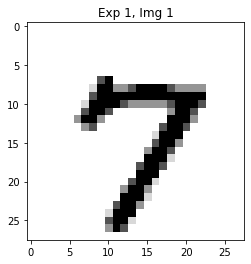

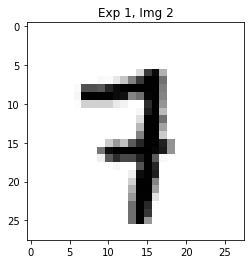

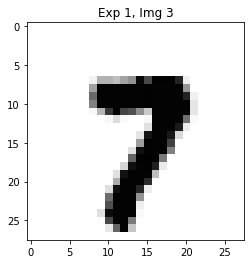

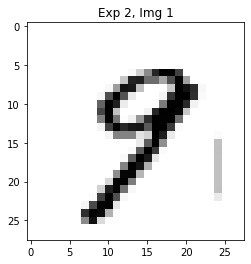

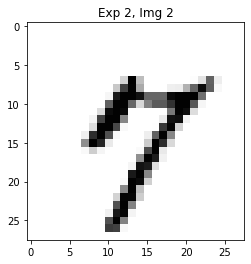

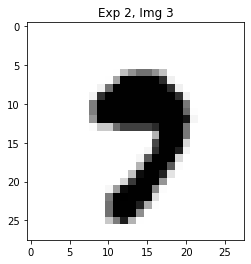

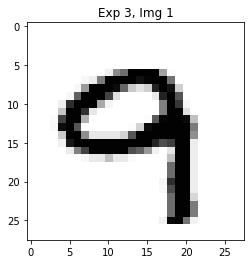

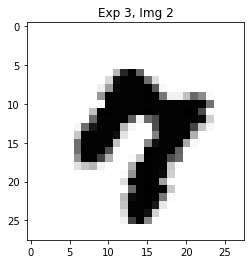

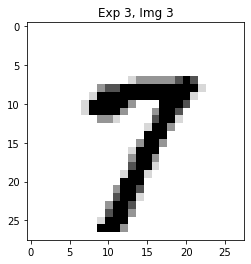

In [0]:
#Displaying first three images acquired by EI acquisition with batch size 25 for all experiments
num_experiments = 3
num_displayed_images = 3
init_size_train = 10
all_exp_ind = [ei_tauinvm5_ind_1, ei_tauinvm5_ind_2, ei_tauinvm5_ind_3]
for e in range(num_experiments):
  exp_ind = all_exp_ind[e]
  print(exp_ind.shape)
  for img_ind in range(num_displayed_images):
    plt.figure()
    plt.title("Exp " + str(e+1) + ", Img " + str(img_ind+1))
    #plt.axis('off')
    plt.imshow(X_train_All[exp_ind[init_size_train+img_ind]], cmap="Greys")


(1010,)
1008
1009
(1010,)
1008
1009
(1010,)
1008
1009


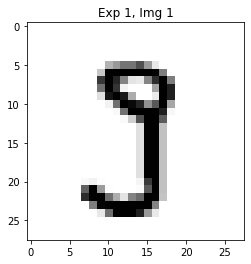

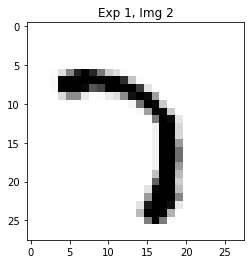

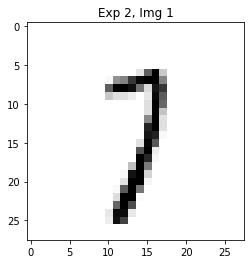

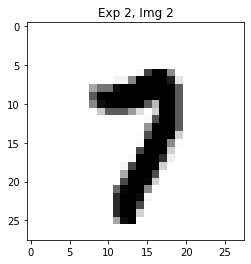

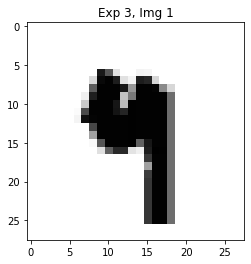

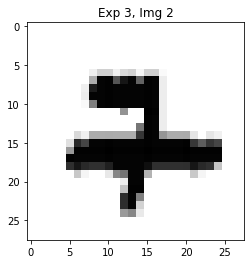

In [0]:
#Displaying last two images acquired by EI acquisition with batch size 25 for all experiments
num_experiments = 3
num_displayed_images = 2
init_size_train = 1008
all_exp_ind = [ei_tauinvm5_ind_1, ei_tauinvm5_ind_2, ei_tauinvm5_ind_3]
for e in range(num_experiments):
  exp_ind = all_exp_ind[e]
  print(exp_ind.shape)
  for img_ind in range(num_displayed_images):
    plt.figure()
    plt.title("Exp " + str(e+1) + ", Img " + str(img_ind+1))
    plt.imshow(X_train_All[exp_ind[init_size_train+img_ind]], cmap="Greys")
    print(init_size_train+img_ind)